0.4644082332761578
N_Components: 2

Classification Report:
               precision    recall  f1-score   support

      Normal       0.58      0.52      0.55      2498
       Relay       0.50      0.56      0.53      2166

    accuracy                           0.54      4664
   macro avg       0.54      0.54      0.54      4664
weighted avg       0.54      0.54      0.54      4664



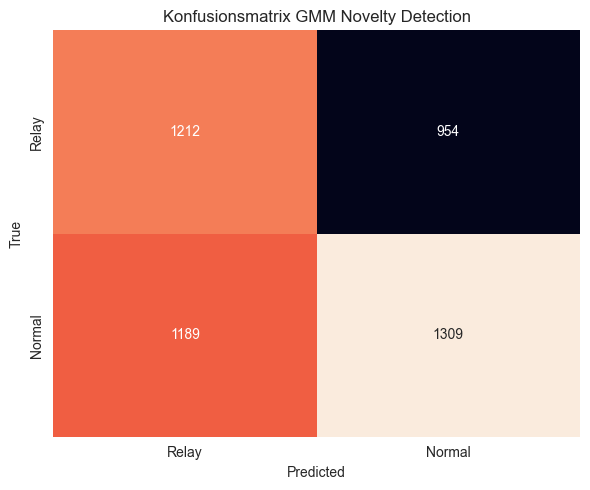

N_Components: 3

Classification Report:
               precision    recall  f1-score   support

      Normal       0.58      0.53      0.55      2498
       Relay       0.50      0.56      0.53      2166

    accuracy                           0.54      4664
   macro avg       0.54      0.54      0.54      4664
weighted avg       0.54      0.54      0.54      4664



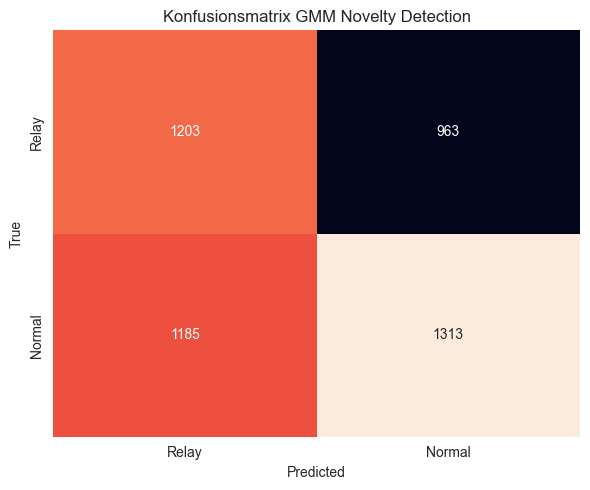

N_Components: 4

Classification Report:
               precision    recall  f1-score   support

      Normal       0.72      0.53      0.61      2498
       Relay       0.58      0.77      0.66      2166

    accuracy                           0.64      4664
   macro avg       0.65      0.65      0.64      4664
weighted avg       0.66      0.64      0.63      4664



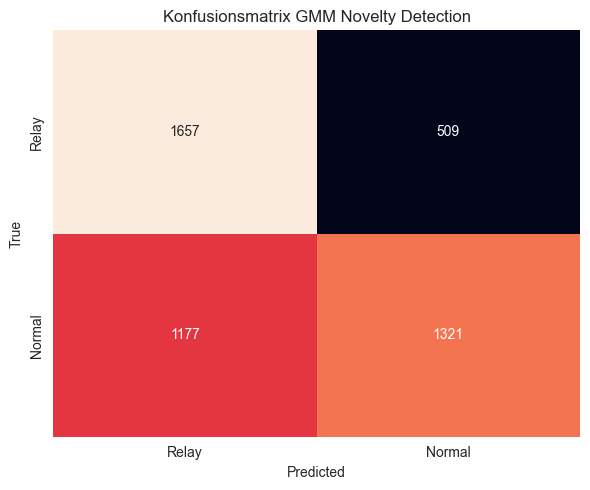

N_Components: 5

Classification Report:
               precision    recall  f1-score   support

      Normal       0.69      0.52      0.59      2498
       Relay       0.57      0.72      0.64      2166

    accuracy                           0.62      4664
   macro avg       0.63      0.62      0.62      4664
weighted avg       0.63      0.62      0.61      4664



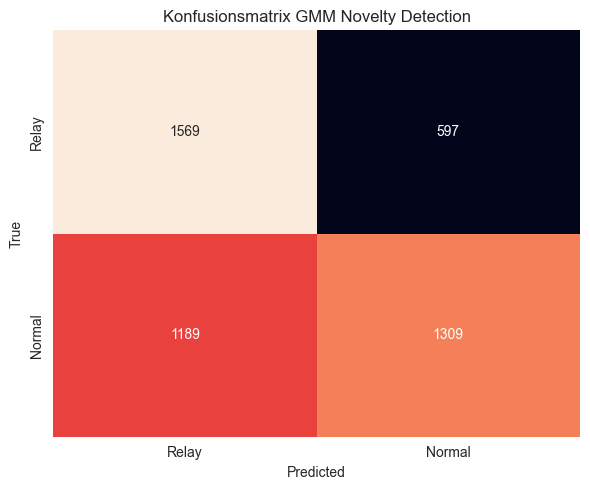

N_Components: 7

Classification Report:
               precision    recall  f1-score   support

      Normal       0.58      0.51      0.54      2498
       Relay       0.50      0.57      0.53      2166

    accuracy                           0.54      4664
   macro avg       0.54      0.54      0.54      4664
weighted avg       0.54      0.54      0.54      4664



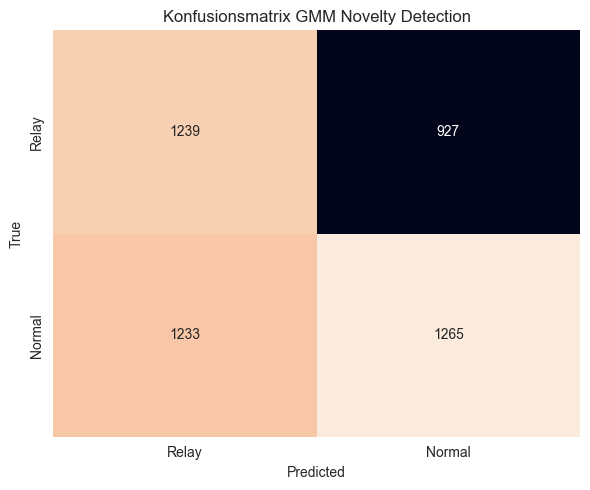

N_Components: 10

Classification Report:
               precision    recall  f1-score   support

      Normal       0.70      0.51      0.59      2498
       Relay       0.57      0.75      0.65      2166

    accuracy                           0.62      4664
   macro avg       0.64      0.63      0.62      4664
weighted avg       0.64      0.62      0.62      4664



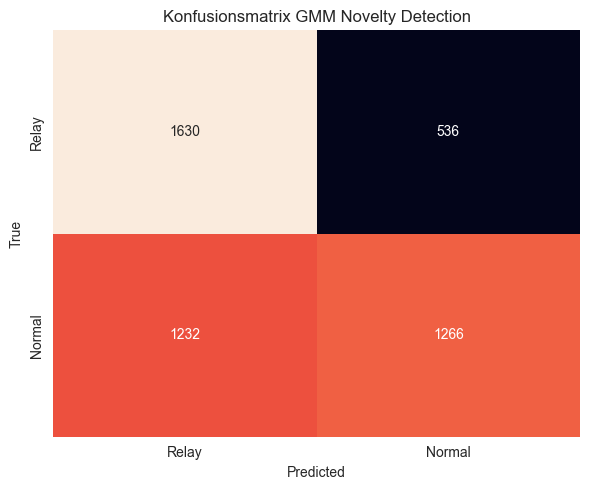

N_Components: 15

Classification Report:
               precision    recall  f1-score   support

      Normal       0.56      0.51      0.53      2498
       Relay       0.49      0.54      0.51      2166

    accuracy                           0.52      4664
   macro avg       0.52      0.52      0.52      4664
weighted avg       0.53      0.52      0.52      4664



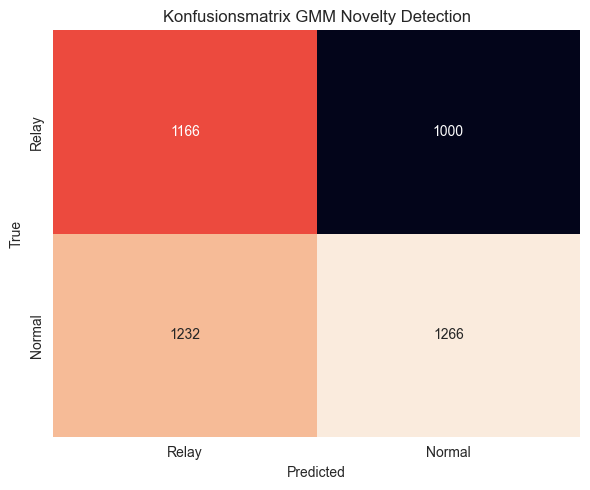

'SCALED DATEN AM BESTEN'

In [8]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from pyod.models.gmm import GMM

# daten laden
normal_path = "transients/S01/1/Normal/q_data"
relay_path  = "transients/S01/1/Relay/q_data"

with h5py.File('datasets/transients_cleaned_padded.h5', 'r') as f:
    normal_group = f[normal_path]
    relay_group  = f[relay_path]

    n_norm = normal_group["0"].shape[0]
    n_relay = relay_group["0"].shape[0]

    dataset_normal = np.zeros((49998, n_norm))
    dataset_relay  = np.zeros((49666, n_relay))

    for i in range(49998):
        dataset_normal[i] = normal_group[str(i)][:]
    for i in range(49666):
        try:
            dataset_relay[i] = relay_group[str(i)][:]
        except KeyError:
            continue

# daten definieren und skalieren
scaler = StandardScaler()

X_train               = dataset_normal[:47500]
X_test_normal         = dataset_normal[47500:]      # 4998 Normal
X_test_relay          = dataset_relay[47500:]        # 4998 Relay

scaler.fit(X_train)
X_train_scaled        = scaler.transform(X_train)
X_test_norm_scaled    = scaler.transform(X_test_normal)
X_test_relay_scaled   = scaler.transform(X_test_relay)

X_test_combined = np.vstack((X_test_normal, X_test_relay))
X_test_combined_scaled = np.vstack((X_test_norm_scaled, X_test_relay_scaled))

y_true = np.array([0] * len(X_test_normal) + [1] * len(X_test_relay))

print(len(X_test_relay)/len(X_test_combined))
# modell trainieren, contamination gibt an, wie viele outlier man im trainigsdatensatz hat
# contamination kann man bei reiner novelty detection zb auf 0.01 oder 0.05 setzen
"""for i in {0.01, 0.03, 0.05, 0.07, 0.09, 0.1}:"""
for n in {2, 3, 4, 5, 7, 10, 15}:
    clf = GMM(contamination=len(X_test_relay)/len(X_test_combined), n_components=n, random_state=42)
    clf.fit(X_train)

    # pyod.predict: 0 = inlier, 1 = outlier
    y_pred = clf.predict(X_test_combined)

    # cm und report
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(f"N_Components: {n}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

    # plot
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Relay","Normal"],
                yticklabels=["Relay","Normal"],
                cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Konfusionsmatrix GMM Novelty Detection")
    plt.tight_layout()
    plt.show()

"""SCALED DATEN AM BESTEN"""

0.4644082332761578
N_Components: 2

Classification Report:
               precision    recall  f1-score   support

      Normal       0.58      0.52      0.55      2498
       Relay       0.50      0.56      0.53      2166

    accuracy                           0.54      4664
   macro avg       0.54      0.54      0.54      4664
weighted avg       0.54      0.54      0.54      4664



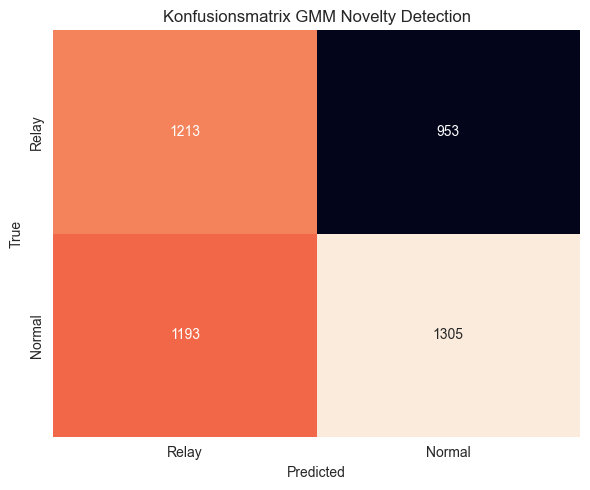

N_Components: 3

Classification Report:
               precision    recall  f1-score   support

      Normal       0.59      0.52      0.56      2498
       Relay       0.52      0.59      0.55      2166

    accuracy                           0.55      4664
   macro avg       0.56      0.56      0.55      4664
weighted avg       0.56      0.55      0.55      4664



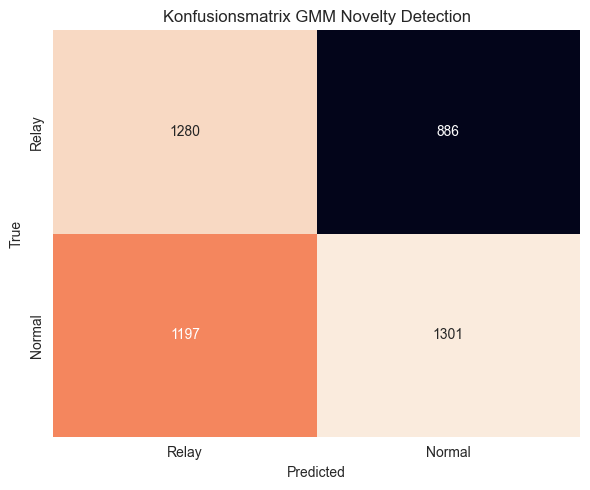

N_Components: 4

Classification Report:
               precision    recall  f1-score   support

      Normal       0.61      0.53      0.57      2498
       Relay       0.53      0.61      0.57      2166

    accuracy                           0.57      4664
   macro avg       0.57      0.57      0.57      4664
weighted avg       0.57      0.57      0.57      4664



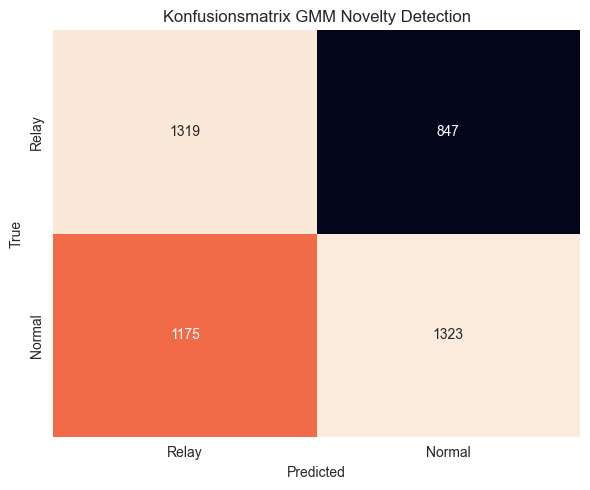

N_Components: 5

Classification Report:
               precision    recall  f1-score   support

      Normal       0.62      0.51      0.56      2498
       Relay       0.53      0.64      0.58      2166

    accuracy                           0.57      4664
   macro avg       0.58      0.58      0.57      4664
weighted avg       0.58      0.57      0.57      4664



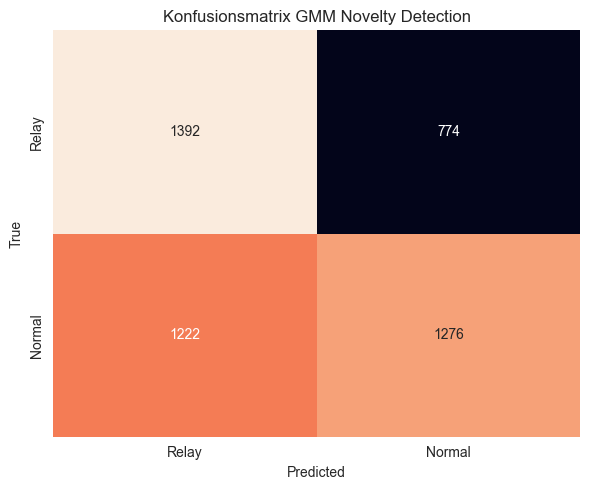

N_Components: 7

Classification Report:
               precision    recall  f1-score   support

      Normal       0.57      0.51      0.54      2498
       Relay       0.49      0.55      0.52      2166

    accuracy                           0.53      4664
   macro avg       0.53      0.53      0.53      4664
weighted avg       0.53      0.53      0.53      4664



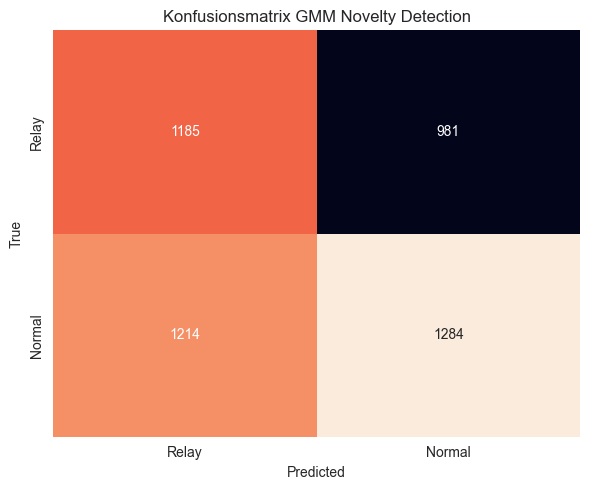

N_Components: 10

Classification Report:
               precision    recall  f1-score   support

      Normal       0.59      0.52      0.55      2498
       Relay       0.51      0.58      0.54      2166

    accuracy                           0.55      4664
   macro avg       0.55      0.55      0.55      4664
weighted avg       0.55      0.55      0.55      4664



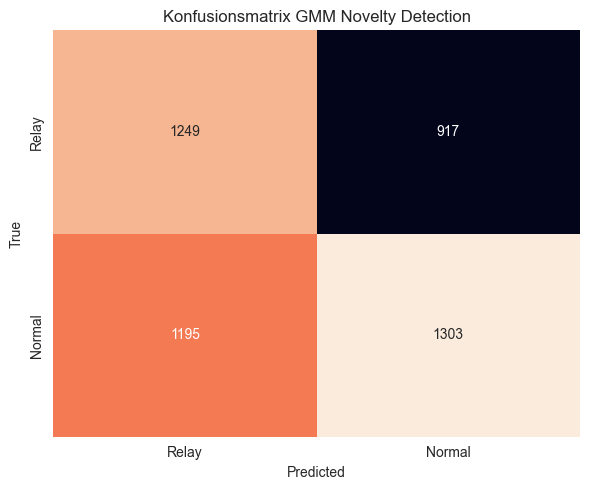

N_Components: 15

Classification Report:
               precision    recall  f1-score   support

      Normal       0.58      0.51      0.54      2498
       Relay       0.50      0.57      0.53      2166

    accuracy                           0.54      4664
   macro avg       0.54      0.54      0.54      4664
weighted avg       0.54      0.54      0.54      4664



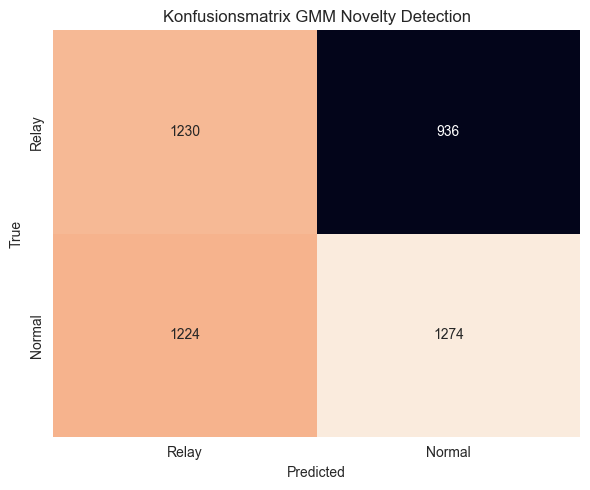

'SCALED DATEN AM BESTEN'

In [9]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from pyod.models.gmm import GMM

# daten laden
normal_path = "transients/S01/1/Normal/q_data"
relay_path  = "transients/S01/1/Relay/q_data"

with h5py.File('datasets/transients_cleaned_padded.h5', 'r') as f:
    normal_group = f[normal_path]
    relay_group  = f[relay_path]

    n_norm = normal_group["0"].shape[0]
    n_relay = relay_group["0"].shape[0]

    dataset_normal = np.zeros((49998, n_norm))
    dataset_relay  = np.zeros((49666, n_relay))

    for i in range(49998):
        dataset_normal[i] = normal_group[str(i)][:]
    for i in range(49666):
        try:
            dataset_relay[i] = relay_group[str(i)][:]
        except KeyError:
            continue

# daten definieren und skalieren
scaler = StandardScaler()

X_train               = dataset_normal[:47500]
X_test_normal         = dataset_normal[47500:]      # 4998 Normal
X_test_relay          = dataset_relay[47500:]        # 4998 Relay

scaler.fit(X_train)
X_train_scaled        = scaler.transform(X_train)
X_test_norm_scaled    = scaler.transform(X_test_normal)
X_test_relay_scaled   = scaler.transform(X_test_relay)

X_test_combined = np.vstack((X_test_normal, X_test_relay))
X_test_combined_scaled = np.vstack((X_test_norm_scaled, X_test_relay_scaled))

y_true = np.array([0] * len(X_test_normal) + [1] * len(X_test_relay))

print(len(X_test_relay)/len(X_test_combined))
# modell trainieren, contamination gibt an, wie viele outlier man im trainigsdatensatz hat
# contamination kann man bei reiner novelty detection zb auf 0.01 oder 0.05 setzen
"""for i in {0.01, 0.03, 0.05, 0.07, 0.09, 0.1}:"""
for n in {2, 3, 4, 5, 7, 10, 15}:
    clf = GMM(contamination=len(X_test_relay)/len(X_test_combined), n_components=n, random_state=42)
    clf.fit(X_train_scaled)

    # pyod.predict: 0 = inlier, 1 = outlier
    y_pred = clf.predict(X_test_combined_scaled)

    # cm und report
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(f"N_Components: {n}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

    # plot
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Relay","Normal"],
                yticklabels=["Relay","Normal"],
                cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Konfusionsmatrix GMM Novelty Detection")
    plt.tight_layout()
    plt.show()

"""SCALED DATEN AM BESTEN"""

0.4644082332761578
N_Components: 40

Classification Report:
               precision    recall  f1-score   support

      Normal       0.60      0.98      0.74      2498
       Relay       0.89      0.24      0.37      2166

    accuracy                           0.63      4664
   macro avg       0.74      0.61      0.56      4664
weighted avg       0.73      0.63      0.57      4664



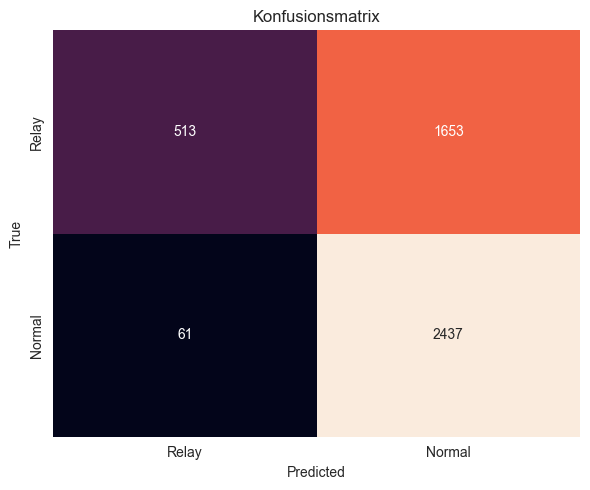

N_Components: 35

Classification Report:
               precision    recall  f1-score   support

      Normal       0.59      0.97      0.74      2498
       Relay       0.88      0.22      0.36      2166

    accuracy                           0.63      4664
   macro avg       0.74      0.60      0.55      4664
weighted avg       0.73      0.63      0.56      4664



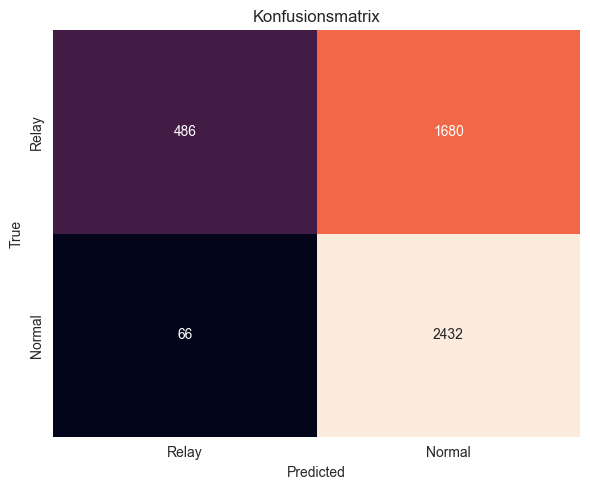

N_Components: 30

Classification Report:
               precision    recall  f1-score   support

      Normal       0.59      0.97      0.74      2498
       Relay       0.89      0.22      0.36      2166

    accuracy                           0.63      4664
   macro avg       0.74      0.60      0.55      4664
weighted avg       0.73      0.63      0.56      4664



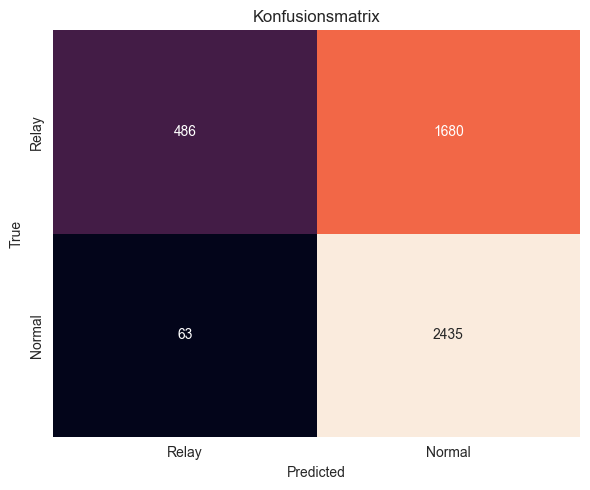

In [12]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from pyod.models.gmm import GMM

# daten laden
normal_path = "transients/S01/1/Normal/q_data"
relay_path  = "transients/S01/1/Relay/q_data"

with h5py.File('datasets/transients_cleaned_padded.h5', 'r') as f:
    normal_group = f[normal_path]
    relay_group  = f[relay_path]

    n_norm = normal_group["0"].shape[0]
    n_relay = relay_group["0"].shape[0]

    dataset_normal = np.zeros((49998, n_norm))
    dataset_relay  = np.zeros((49666, n_relay))

    for i in range(49998):
        dataset_normal[i] = normal_group[str(i)][:]
    for i in range(49666):
        try:
            dataset_relay[i] = relay_group[str(i)][:]
        except KeyError:
            continue

# daten definieren und skalieren
scaler = MinMaxScaler()

X_train               = dataset_normal[:47500]
X_test_normal         = dataset_normal[47500:]      # 4998 Normal
X_test_relay          = dataset_relay[47500:]        # 4998 Relay

scaler.fit(X_train)
X_train_scaled        = scaler.transform(X_train)
X_test_norm_scaled    = scaler.transform(X_test_normal)
X_test_relay_scaled   = scaler.transform(X_test_relay)

X_test_combined = np.vstack((X_test_normal, X_test_relay))
X_test_combined_scaled = np.vstack((X_test_norm_scaled, X_test_relay_scaled))

y_true = np.array([0] * len(X_test_normal) + [1] * len(X_test_relay))

print(len(X_test_relay)/len(X_test_combined))
# modell trainieren, contamination gibt an, wie viele outlier man im trainigsdatensatz hat
# contamination kann man bei reiner novelty detection zb auf 0.01 oder 0.05 setzen
for n in {30,35,40}:
    clf = GMM(contamination=0.01, n_components=n, random_state=42)
    clf.fit(X_train_scaled)

    # pyod.predict: 0 = inlier, 1 = outlier
    y_pred = clf.predict(X_test_combined_scaled)

    # cm und report
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(f"N_Components: {n}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

    # plot
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Relay","Normal"],
                yticklabels=["Relay","Normal"],
                cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Konfusionsmatrix")
    plt.tight_layout()
    plt.show()

0.4644082332761578
N_Components: 40

Classification Report:
               precision    recall  f1-score   support

      Normal       0.59      0.97      0.73      2498
       Relay       0.85      0.21      0.34      2166

    accuracy                           0.62      4664
   macro avg       0.72      0.59      0.54      4664
weighted avg       0.71      0.62      0.55      4664



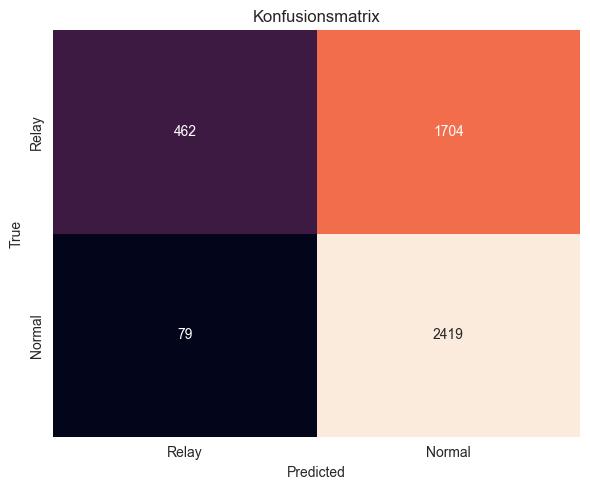

N_Components: 35

Classification Report:
               precision    recall  f1-score   support

      Normal       0.59      0.97      0.73      2498
       Relay       0.87      0.21      0.33      2166

    accuracy                           0.62      4664
   macro avg       0.73      0.59      0.53      4664
weighted avg       0.72      0.62      0.55      4664



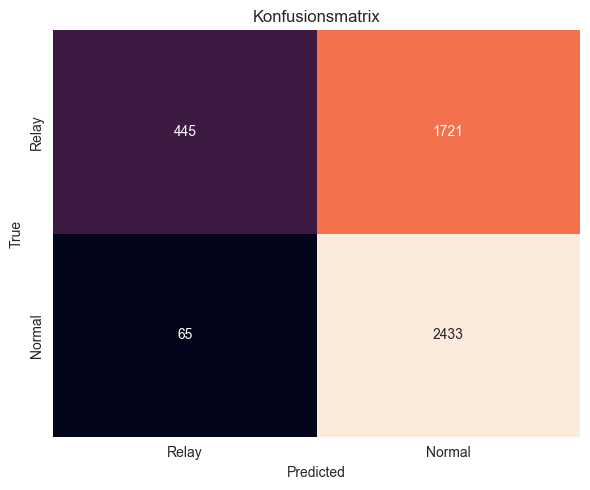

KeyboardInterrupt: 

In [13]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from pyod.models.gmm import GMM

# daten laden
normal_path = "transients/S01/1/Normal/q_data"
relay_path  = "transients/S01/1/Relay/q_data"

with h5py.File('datasets/transients_cleaned_padded.h5', 'r') as f:
    normal_group = f[normal_path]
    relay_group  = f[relay_path]

    n_norm = normal_group["0"].shape[0]
    n_relay = relay_group["0"].shape[0]

    dataset_normal = np.zeros((49998, n_norm))
    dataset_relay  = np.zeros((49666, n_relay))

    for i in range(49998):
        dataset_normal[i] = normal_group[str(i)][:]
    for i in range(49666):
        try:
            dataset_relay[i] = relay_group[str(i)][:]
        except KeyError:
            continue

# daten definieren und skalieren
scaler = StandardScaler()

X_train               = dataset_normal[:47500]
X_test_normal         = dataset_normal[47500:]      # 4998 Normal
X_test_relay          = dataset_relay[47500:]        # 4998 Relay

scaler.fit(X_train)
X_train_scaled        = scaler.transform(X_train)
X_test_norm_scaled    = scaler.transform(X_test_normal)
X_test_relay_scaled   = scaler.transform(X_test_relay)

X_test_combined = np.vstack((X_test_normal, X_test_relay))
X_test_combined_scaled = np.vstack((X_test_norm_scaled, X_test_relay_scaled))

y_true = np.array([0] * len(X_test_normal) + [1] * len(X_test_relay))

print(len(X_test_relay)/len(X_test_combined))
# modell trainieren, contamination gibt an, wie viele outlier man im trainigsdatensatz hat
# contamination kann man bei reiner novelty detection zb auf 0.01 oder 0.05 setzen
for n in {30,35,40}:
    clf = GMM(contamination=0.01, n_components=n, random_state=42)
    clf.fit(X_train_scaled)

    # pyod.predict: 0 = inlier, 1 = outlier
    y_pred = clf.predict(X_test_combined_scaled)

    # cm und report
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(f"N_Components: {n}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

    # plot
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Relay","Normal"],
                yticklabels=["Relay","Normal"],
                cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Konfusionsmatrix")
    plt.tight_layout()
    plt.show()

0.4644082332761578

Classification Report:
               precision    recall  f1-score   support

      Normal       0.60      0.95      0.74      2498
       Relay       0.83      0.27      0.40      2166

    accuracy                           0.63      4664
   macro avg       0.72      0.61      0.57      4664
weighted avg       0.71      0.63      0.58      4664



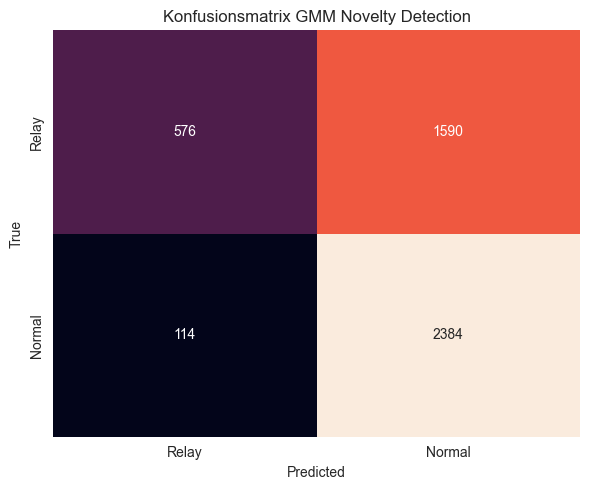

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from pyod.models.gmm import GMM

# daten laden
normal_path = "transients/S01/1/Normal/q_data"
relay_path  = "transients/S01/1/Relay/q_data"

with h5py.File('datasets/transients_cleaned_padded.h5', 'r') as f:
    normal_group = f[normal_path]
    relay_group  = f[relay_path]

    n_norm = normal_group["0"].shape[0]
    n_relay = relay_group["0"].shape[0]

    dataset_normal = np.zeros((49998, n_norm))
    dataset_relay  = np.zeros((49666, n_relay))

    for i in range(49998):
        dataset_normal[i] = normal_group[str(i)][:]
    for i in range(49666):
        try:
            dataset_relay[i] = relay_group[str(i)][:]
        except KeyError:
            continue

# daten definieren und skalieren
scaler = StandardScaler()

X_train               = dataset_normal[:47500]
X_test_normal         = dataset_normal[47500:]      # 4998 Normal
X_test_relay          = dataset_relay[47500:]        # 4998 Relay

scaler.fit(X_train)
X_train_scaled        = scaler.transform(X_train)
X_test_norm_scaled    = scaler.transform(X_test_normal)
X_test_relay_scaled   = scaler.transform(X_test_relay)

X_test_combined = np.vstack((X_test_normal, X_test_relay))
X_test_combined_scaled = np.vstack((X_test_norm_scaled, X_test_relay_scaled))

y_true = np.array([0] * len(X_test_normal) + [1] * len(X_test_relay))

print(len(X_test_relay)/len(X_test_combined))
# modell trainieren, contamination gibt an, wie viele outlier man im trainigsdatensatz hat
# contamination kann man bei reiner novelty detection zb auf 0.01 oder 0.05 setzen
clf = GMM(contamination=0.03, n_components=15, covariance_type="full", random_state=42)
clf.fit(X_train)

# pyod.predict: 0 = inlier, 1 = outlier
y_pred = clf.predict(X_test_combined)

# cm und report
cm = confusion_matrix(y_true, y_pred, labels=[1,0])
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

# plot
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=["Relay","Normal"],
            yticklabels=["Relay","Normal"],
            cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Konfusionsmatrix GMM Novelty Detection")
plt.tight_layout()
plt.show()